In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, rgb2hex

colors = ['#E2DFD0', '#88070B']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=4)

# 将 colormap 转换为十六进制颜色列表
cmap_hex_list = [rgb2hex(rgba) for rgba in cmap(np.linspace(0, 1, 4))]
cmap_hex_list

['#e2dfd0', '#c4978e', '#a64f4d', '#88070b']

C:\Users\15510\AppData\Local\Temp\ipykernel_25892\2941387238.py:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_ana = pd.read_csv('../simulation_result/Fig02_ana.csv', header=None, error_bad_lines=False)
b'Skipping line 642: expected 7 fields, saw 13\nSkipping line 680: expected 7 fields, saw 13\nSkipping line 1000: expected 7 fields, saw 13\nSkipping line 1591: expected 7 fields, saw 12\n'


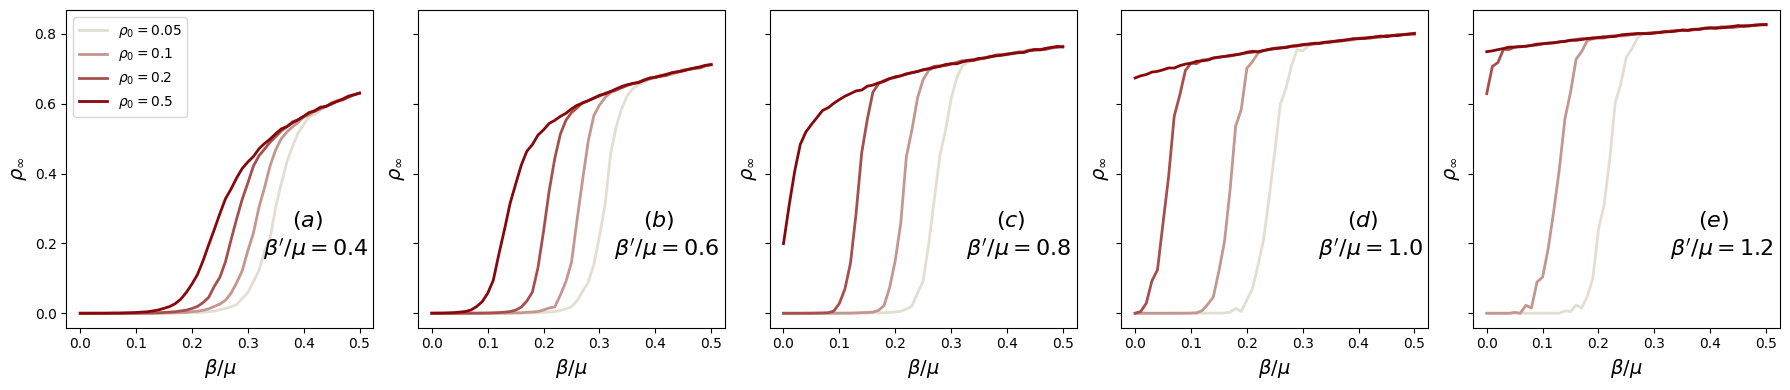

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取 simu 数据
df_simu = pd.read_csv('../simulation_result/FIG02_simu.csv', header=None)
df_simu.columns = ['infect_result', 'beta_h', 'beta', 'sign', 'seed', 'num_agents', 'id'] + ["S_K", "S_HighOrderK", "S_CC_Ratio",
           "I_K", "I_HighOrderK", "I_CC_Ratio",
           "A_K", "A_HighOrderK", "A_CC_Ratio"]


df_ana = pd.read_csv('../simulation_result/Fig02_ana.csv', header=None, error_bad_lines=False)
df_ana.columns = ['infect_result', 'beta_h', 'beta', 'sign', 'seed', 'num_agents', 'id']

parameters = [(seed, beta_h) for seed in [0.05, 0.1, 0.2, 0.5] for beta_h in [0.4, 0.6, 0.8, 1.0, 1.2]]

# 创建子图
fig, axes = plt.subplots(1, 5, figsize=(18, 4),sharey=True)
# seedmap = [0.1, 0.2, 0.5]
title_map = 'abcdefghijklmn'
# color_map = ['#d1c2d3','#de7897','#951c48','#621d34']
color_map = cmap_hex_list
seedmap = [0.05, 0.1, 0.2, 0.5]
beta_h_map = [0.4, 0.6, 0.8, 1.0, 1.2]
# 循环绘制每个子图
for sign in range(20):
    # 绘制 ana 数据（线性图）
    col = sign%5
    row = sign//5
    seed = parameters[sign][0]
    ax = axes[col]

    # 仅模拟数据均值
    data_simu = df_simu[(df_simu['sign'] == sign)].sort_values(by = 'beta').groupby('id').mean()
    ax.plot(data_simu['beta'] , data_simu['infect_result'],c =color_map[row],linewidth = 2,
              alpha=1, label=f'$\\rho_0 = {seed}$')


    #理论数据与模拟拟合
    # data_ana = df_ana[(df_ana['sign'] == sign)].sort_values(by = 'id')
    # ax.plot(data_ana['beta'], data_ana['infect_result'], c =color_map[row], linestyle='-',linewidth=3, label=f'$\\rho_0 = {seed}$')
    # data_simu = df_simu[(df_simu['sign'] == sign)]
    # ax.scatter(data_simu['beta'] , data_simu['infect_result'],c =color_map[row],s =15,  alpha=0.2)

    ####
    ax.set_title(f'$({title_map[col]})$  \n $\\beta\' /\\mu = {parameters[col][1]}$',
                 x=0.8, y=0.2, horizontalalignment='center', fontsize=16)
    ax.set_xlabel('$\\beta/\\mu$', fontsize=14)
    ax.set_ylabel('$\\rho_{\infty}$', fontsize=14)
axes[0].legend(loc=0)

plt.tight_layout()
plt.savefig('D:\科研任务\HighOrder-Ada\FIG\Fig02_loop.pdf', format='pdf', bbox_inches='tight')
plt.show()


C:\Users\15510\AppData\Local\Temp\ipykernel_25892\2084114102.py:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_ana = pd.read_csv('../simulation_result/Fig02_ana.csv', header=None, error_bad_lines=False)
b'Skipping line 642: expected 7 fields, saw 13\nSkipping line 680: expected 7 fields, saw 13\nSkipping line 1000: expected 7 fields, saw 13\nSkipping line 1591: expected 7 fields, saw 12\n'


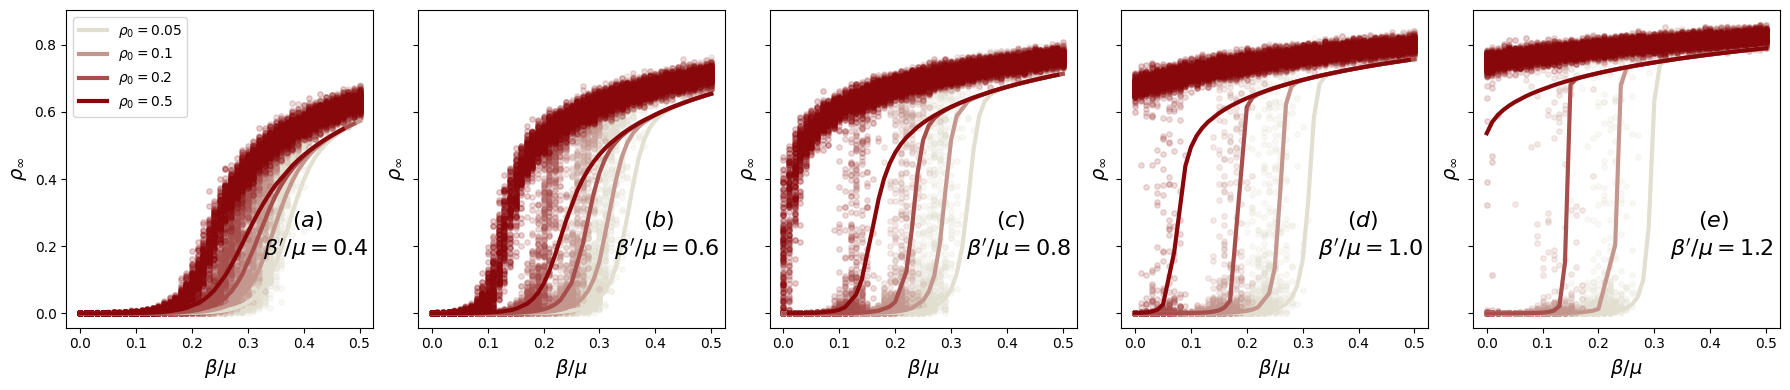

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取 simu 数据
df_simu = pd.read_csv('../simulation_result/FIG02_simu.csv', header=None)
df_simu.columns = ['infect_result', 'beta_h', 'beta', 'sign', 'seed', 'num_agents', 'id'] + ["S_K", "S_HighOrderK", "S_CC_Ratio",
           "I_K", "I_HighOrderK", "I_CC_Ratio",
           "A_K", "A_HighOrderK", "A_CC_Ratio"]


df_ana = pd.read_csv('../simulation_result/Fig02_ana.csv', header=None, error_bad_lines=False)
df_ana.columns = ['infect_result', 'beta_h', 'beta', 'sign', 'seed', 'num_agents', 'id']

parameters = [(seed, beta_h) for seed in [0.05, 0.1, 0.2, 0.5] for beta_h in [0.4, 0.6, 0.8, 1.0, 1.2]]

# 创建子图
fig, axes = plt.subplots(1, 5, figsize=(18, 4),sharey=True)
# seedmap = [0.1, 0.2, 0.5]
title_map = 'abcdefghijklmn'
# color_map = ['#d1c2d3','#de7897','#951c48','#621d34']
color_map = cmap_hex_list
seedmap = [0.05, 0.1, 0.2, 0.5]
beta_h_map = [0.4, 0.6, 0.8, 1.0, 1.2]
# 循环绘制每个子图
for sign in range(20):
    # 绘制 ana 数据（线性图）
    col = sign%5
    row = sign//5
    seed = parameters[sign][0]
    ax = axes[col]

    # # 仅模拟数据均值
    # data_simu = df_simu[(df_simu['sign'] == sign)].sort_values(by = 'beta').groupby('id').mean()
    # ax.plot(data_simu['beta'] , data_simu['infect_result'],c =color_map[row],linewidth = 2,
    #           alpha=1, label=f'$\\rho_0 = {seed}$')


    #理论数据与模拟拟合
    data_ana = df_ana[(df_ana['sign'] == sign)].sort_values(by = 'id')
    ax.plot(data_ana['beta'], data_ana['infect_result'], c =color_map[row], linestyle='-',linewidth=3, label=f'$\\rho_0 = {seed}$')
    data_simu = df_simu[(df_simu['sign'] == sign)]
    ax.scatter(data_simu['beta'] , data_simu['infect_result'],c =color_map[row],s =15,  alpha=0.2)

    ####
    ax.set_title(f'$({title_map[col]})$  \n $\\beta\' /\\mu = {parameters[col][1]}$',
                 x=0.8, y=0.2, horizontalalignment='center', fontsize=16)
    ax.set_xlabel('$\\beta/\\mu$', fontsize=14)
    ax.set_ylabel('$\\rho_{\infty}$', fontsize=14)
axes[0].legend(loc=0)

plt.tight_layout()
# plt.savefig('D:\科研任务\HighOrder-Ada\FIG\Fig02_loop.pdf', format='pdf', bbox_inches='tight')
plt.show()
